Mall Customer Segmentation Analysis
Project Overview
This project applies unsupervised machine learning to segment mall customers based on their annual income and spending behavior. Customer segmentation is a critical business strategy that helps companies understand their customer base, optimize marketing campaigns, and improve customer experience.
Business Problem
Problem Statement: A shopping mall wants to understand their customer base better to:

Create targeted marketing campaigns
Optimize product placement and store layout
Develop personalized offers and promotions
Improve customer retention strategies

Objective: Use K-means clustering to identify distinct customer segments based on purchasing behavior patterns.
Dataset Description
The dataset contains 200 customer records with the following features:

CustomerID: Unique identifier for each customer
Gender: Customer's gender (Male/Female)
Age: Customer's age
Annual Income (k$): Customer's yearly income in thousands of dollars
Spending Score (1-100): Score assigned based on customer spending behavior and purchasing power

Methodology
1. Data Exploration and Preprocessing

Load and examine the dataset structure
Check for missing values and duplicates
Perform statistical analysis of the data
Visualize data distributions

2. Feature Selection

Select relevant features for clustering (Annual Income and Spending Score)
These features represent the customer's financial capacity and spending behavior

3. Optimal Cluster Selection

Apply the Elbow Method to determine optimal number of clusters
Analyze Within-Cluster Sum of Squares (WCSS) for different cluster numbers

4. K-means Clustering Implementation

Implement K-means algorithm with optimal cluster number
Fit the model and generate cluster assignments

5. Results Visualization and Interpretation

Create scatter plots to visualize customer segments
Mark cluster centroids
Interpret business meaning of each segment

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
# 1. DATA LOADING AND EXPLORATION
print("=== MALL CUSTOMER SEGMENTATION ANALYSIS ===\n")

# Load the dataset
df = pd.read_csv('/Users/ajaychaudhary/Documents/data Science  notes and questions /DATASETS FOLDER/Mall_customers.csv')


=== MALL CUSTOMER SEGMENTATION ANALYSIS ===



In [12]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [14]:
print("1. DATASET OVERVIEW")
print("-" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

1. DATASET OVERVIEW
--------------------------------------------------
Dataset shape: (200, 5)
Number of customers: 200
Number of features: 5

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [16]:
print("\n2. DATA QUALITY CHECK")
print("-" * 50)
print("Missing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print("\nData types:")
print(df.dtypes)



2. DATA QUALITY CHECK
--------------------------------------------------
Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows: 0

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [18]:
print("\n3. STATISTICAL SUMMARY")
print("-" * 50)
print(df.describe())



3. STATISTICAL SUMMARY
--------------------------------------------------
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [20]:

# 2. EXPLORATORY DATA ANALYSIS
print("\n4. EXPLORATORY DATA ANALYSIS")
print("-" * 50)



4. EXPLORATORY DATA ANALYSIS
--------------------------------------------------


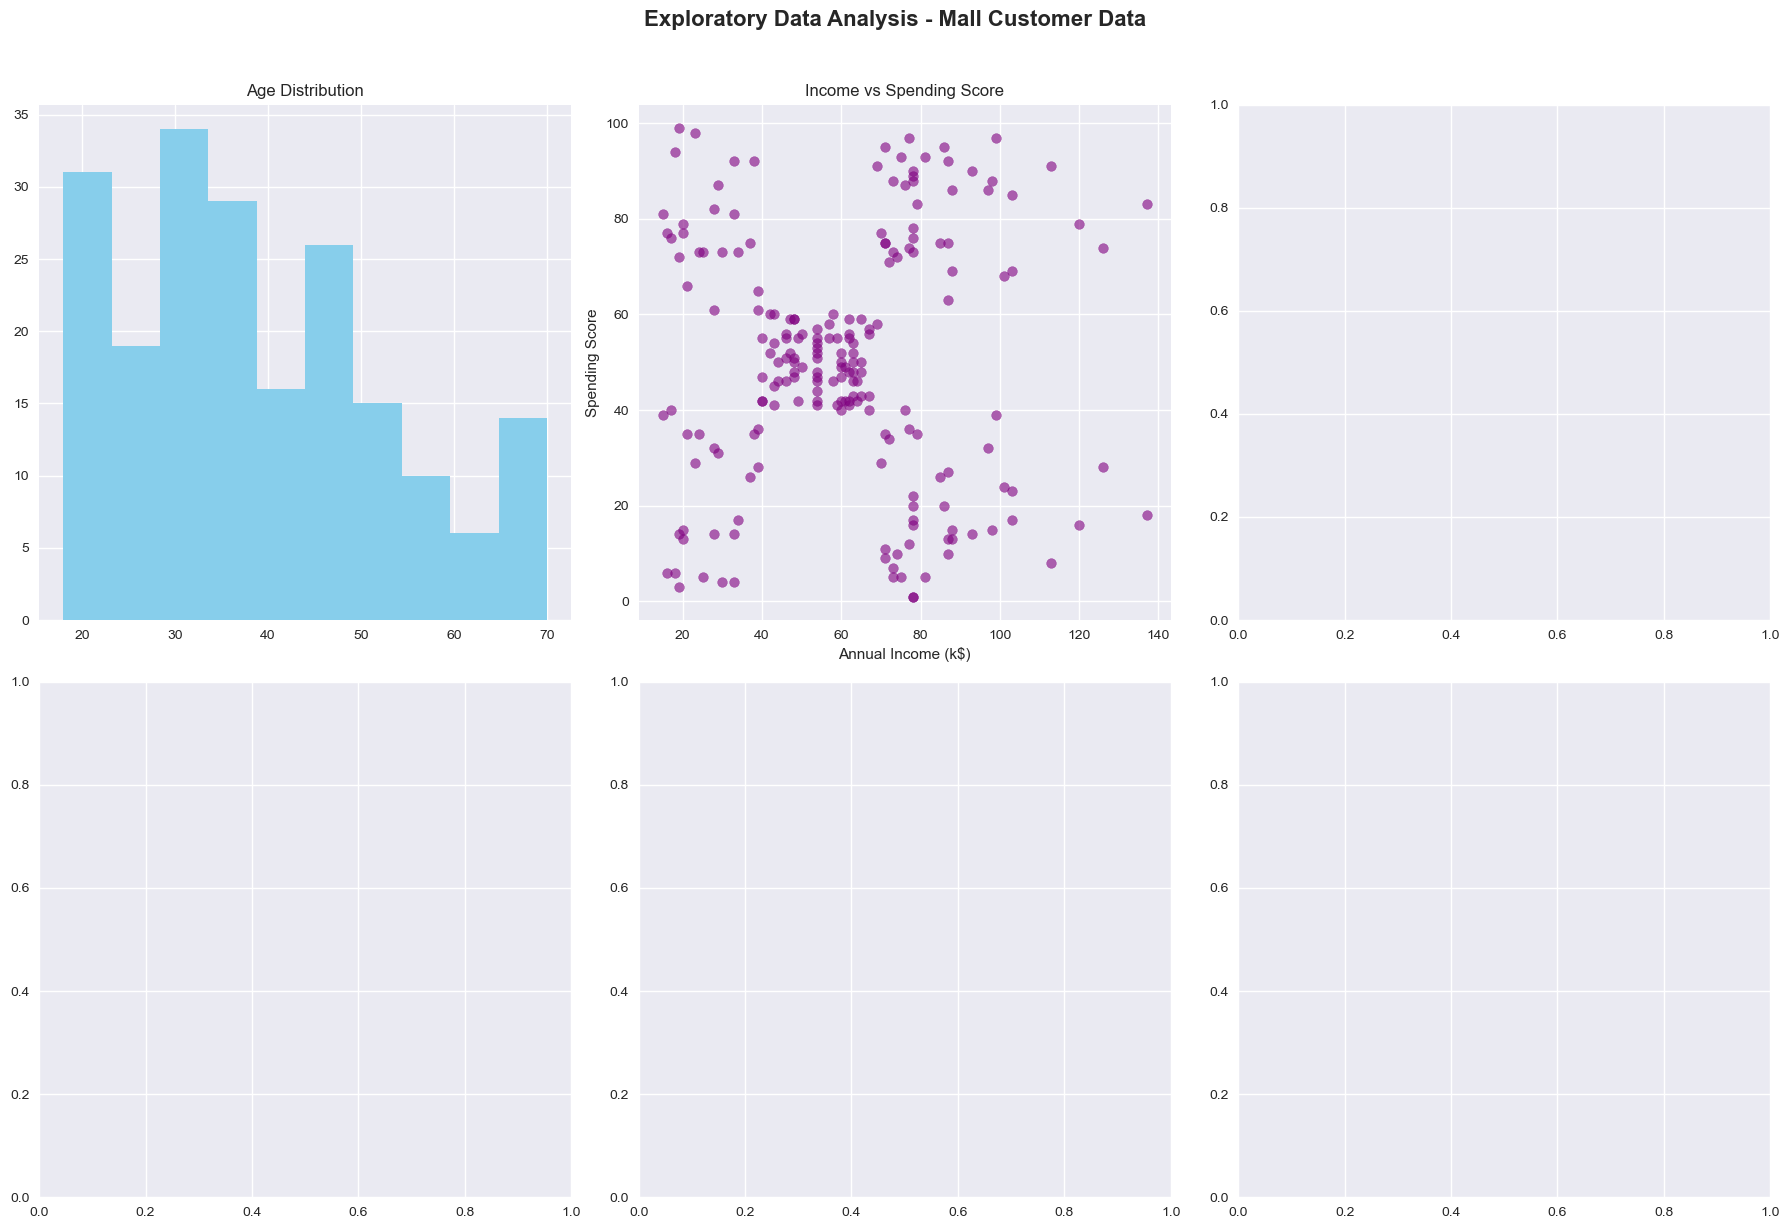

In [109]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Add a main title with more space at the top
fig.suptitle('Exploratory Data Analysis - Mall Customer Data',
             fontsize=16, fontweight='bold', y=1.02)

# Flatten axes for easy iteration (optional)
axes = axes.flatten()

# Example: draw something on first subplot
axes[0].hist(df['Age'], bins=10, color='skyblue')
axes[0].set_title('Age Distribution')

# Example: scatter plot on second subplot
axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                alpha=0.6, color='purple')
axes[1].set_title('Income vs Spending Score')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score')

# Adjust layout so the suptitle and axes don’t overlap
plt.tight_layout()

# Show the figure
plt.show()


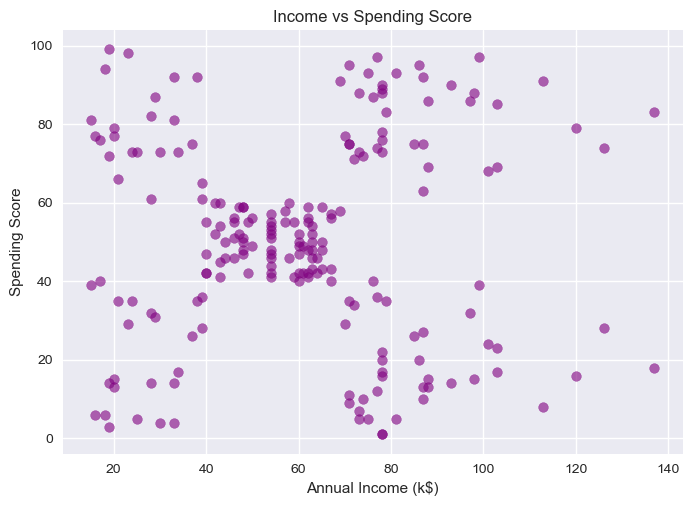

In [42]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            alpha=0.6, color='purple')
plt.title('Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


In [44]:
# 3. FEATURE SELECTION FOR CLUSTERING
print("\n5. FEATURE SELECTION")
print("-" * 50)


5. FEATURE SELECTION
--------------------------------------------------


In [51]:
# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

print(f"Selected features for clustering: {features}")
print(f"Feature matrix shape: {X.shape}")
print("\nFeature statistics:")
print(X.describe())

Selected features for clustering: ['Annual Income (k$)', 'Spending Score (1-100)']
Feature matrix shape: (200, 2)

Feature statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


In [55]:
 #4. OPTIMAL NUMBER OF CLUSTERS - ELBOW METHOD
print("\n6. DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("-" * 50)



6. DETERMINING OPTIMAL NUMBER OF CLUSTERS
--------------------------------------------------


In [57]:
# Calculate WCSS for different cluster numbers
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

([<matplotlib.axis.XTick at 0x12a260170>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

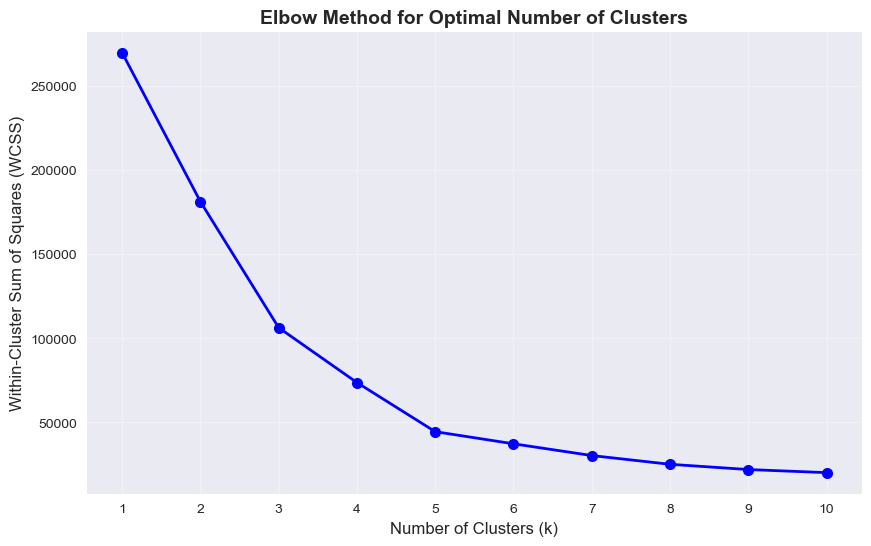

In [59]:
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)


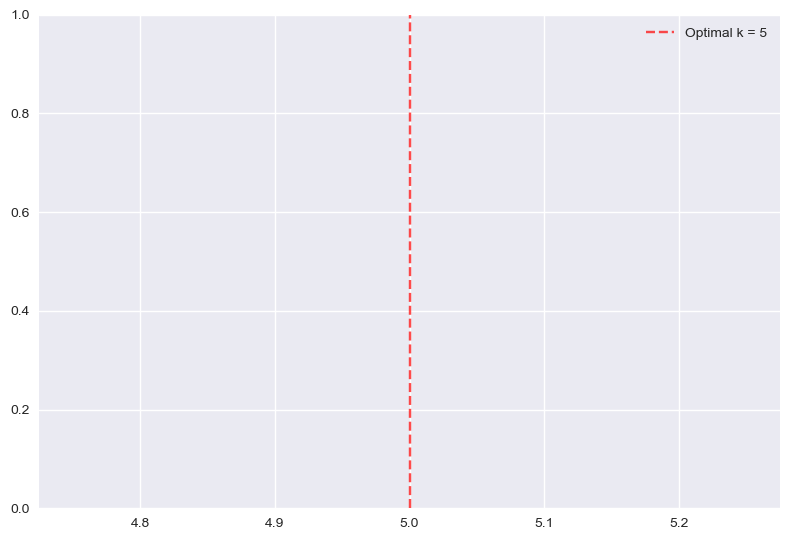

Based on the Elbow Method, optimal number of clusters: 5


In [61]:

# Highlight the elbow point
optimal_k = 5
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k = {optimal_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Based on the Elbow Method, optimal number of clusters: {optimal_k}")


In [63]:
# 5. K-MEANS CLUSTERING IMPLEMENTATION
print("\n7. K-MEANS CLUSTERING IMPLEMENTATION")
print("-" * 50)



7. K-MEANS CLUSTERING IMPLEMENTATION
--------------------------------------------------


In [65]:
# Apply K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

In [67]:


# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print(f"K-means clustering completed with {optimal_k} clusters")
print(f"Cluster centers:\n{kmeans.cluster_centers_}")

# Cluster distribution
print(f"\nCustomers per cluster:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} customers ({count/len(df)*100:.1f}%)")


K-means clustering completed with 5 clusters
Cluster centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

Customers per cluster:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)


In [71]:
 #6. RESULTS VISUALIZATION
print("\n8. CLUSTER VISUALIZATION")
print("-" * 50)


8. CLUSTER VISUALIZATION
--------------------------------------------------


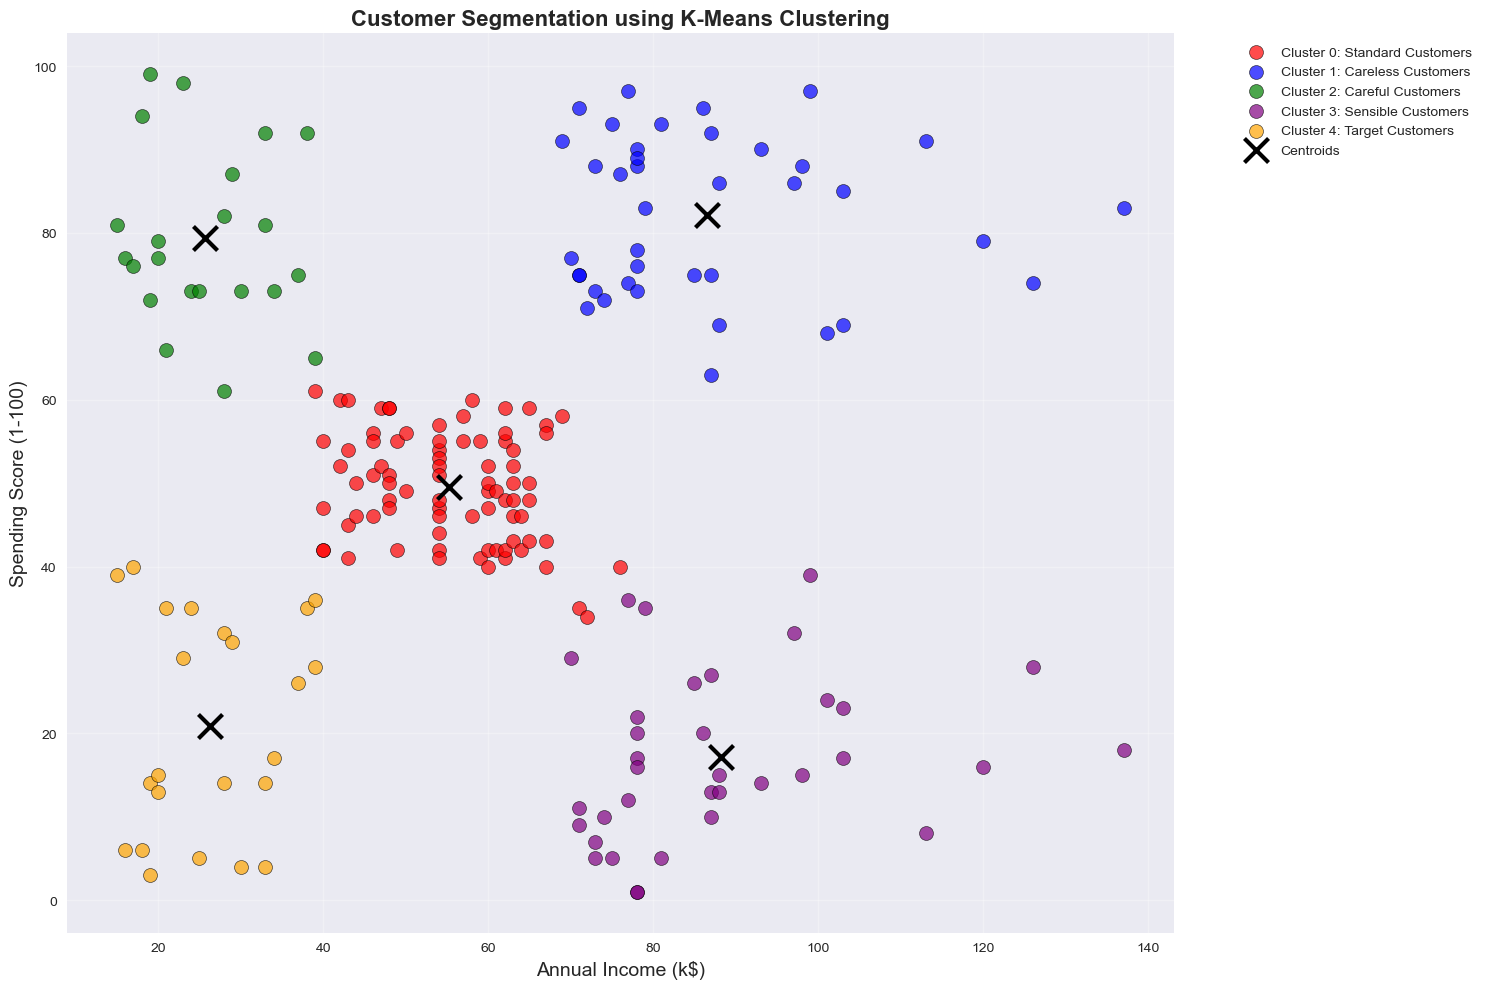

In [83]:
 #Create comprehensive visualization
plt.figure(figsize=(15, 10))

# Define colors for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']
cluster_names = [
    'Standard Customers',
    'Careless Customers', 
    'Careful Customers',
    'Sensible Customers',
    'Target Customers'
]

# Plot each cluster
for i in range(optimal_k):
    cluster_data = X[cluster_labels == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
                c=colors[i], label=f'Cluster {i}: {cluster_names[i]}', 
                s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', marker='x', s=300, linewidths=3, label='Centroids')

plt.title('Customer Segmentation using K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [85]:
# 7. CLUSTER ANALYSIS AND BUSINESS INSIGHTS
print("\n9. CLUSTER ANALYSIS AND BUSINESS INSIGHTS")
print("=" * 70)



9. CLUSTER ANALYSIS AND BUSINESS INSIGHTS


In [87]:
# Analyze each cluster
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\n🎯 CLUSTER {i}: {cluster_names[i].upper()}")
    print("-" * 50)
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average annual income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"Average spending score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"Gender distribution: {dict(cluster_data['Gender'].value_counts())}")



🎯 CLUSTER 0: STANDARD CUSTOMERS
--------------------------------------------------
Number of customers: 81
Average age: 42.7 years
Average annual income: $55.3k
Average spending score: 49.5
Gender distribution: {'Female': 48, 'Male': 33}

🎯 CLUSTER 1: CARELESS CUSTOMERS
--------------------------------------------------
Number of customers: 39
Average age: 32.7 years
Average annual income: $86.5k
Average spending score: 82.1
Gender distribution: {'Female': 21, 'Male': 18}

🎯 CLUSTER 2: CAREFUL CUSTOMERS
--------------------------------------------------
Number of customers: 22
Average age: 25.3 years
Average annual income: $25.7k
Average spending score: 79.4
Gender distribution: {'Female': 13, 'Male': 9}

🎯 CLUSTER 3: SENSIBLE CUSTOMERS
--------------------------------------------------
Number of customers: 35
Average age: 41.1 years
Average annual income: $88.2k
Average spending score: 17.1
Gender distribution: {'Male': 19, 'Female': 16}

🎯 CLUSTER 4: TARGET CUSTOMERS
---------------

In [89]:
# Business interpretation
print("\n10. BUSINESS INTERPRETATION AND RECOMMENDATIONS")
print("=" * 70)

business_insights = {
    0: {
        "profile": "Standard Customers (Medium Income, Medium Spending)",
        "strategy": "Balanced marketing approach, loyalty programs, seasonal promotions"
    },
    1: {
        "profile": "Careless Customers (High Income, Low Spending)", 
        "strategy": "Premium product showcasing, exclusive offers, personalized service"
    },
    2: {
        "profile": "Careful Customers (Low Income, Low Spending)",
        "strategy": "Budget-friendly options, discount campaigns, value propositions"
    },
    3: {
        "profile": "Sensible Customers (Low Income, High Spending)",
        "strategy": "Credit options, installment plans, affordable premium products"
    },
    4: {
        "profile": "Target Customers (High Income, High Spending)",
        "strategy": "VIP treatment, luxury products, premium services, exclusive events"
    }
}

for cluster_id, info in business_insights.items():
    print(f"\n🎯 {cluster_names[cluster_id]}:")
    print(f"   Profile: {info['profile']}")
    print(f"   Strategy: {info['strategy']}")



10. BUSINESS INTERPRETATION AND RECOMMENDATIONS

🎯 Standard Customers:
   Profile: Standard Customers (Medium Income, Medium Spending)
   Strategy: Balanced marketing approach, loyalty programs, seasonal promotions

🎯 Careless Customers:
   Profile: Careless Customers (High Income, Low Spending)
   Strategy: Premium product showcasing, exclusive offers, personalized service

🎯 Careful Customers:
   Profile: Careful Customers (Low Income, Low Spending)
   Strategy: Budget-friendly options, discount campaigns, value propositions

🎯 Sensible Customers:
   Profile: Sensible Customers (Low Income, High Spending)
   Strategy: Credit options, installment plans, affordable premium products

🎯 Target Customers:
   Profile: Target Customers (High Income, High Spending)
   Strategy: VIP treatment, luxury products, premium services, exclusive events


In [91]:
# 8. MODEL EVALUATION
print(f"\n11. MODEL PERFORMANCE")
print("=" * 50)
print(f"Final WCSS (Inertia): {kmeans.inertia_:.2f}")
print(f"Number of iterations: {kmeans.n_iter_}")



11. MODEL PERFORMANCE
Final WCSS (Inertia): 44448.46
Number of iterations: 4


In [93]:
# Create a summary DataFrame
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['count', 'mean'],
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

cluster_summary.columns = ['Customer_Count', 'Avg_Age', 'Avg_Income', 'Avg_Spending_Score']
cluster_summary['Cluster_Name'] = cluster_names
print(f"\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
         Customer_Count  Avg_Age  Avg_Income  Avg_Spending_Score  \
Cluster                                                            
0                    81    42.72       55.30               49.52   
1                    39    32.69       86.54               82.13   
2                    22    25.27       25.73               79.36   
3                    35    41.11       88.20               17.11   
4                    23    45.22       26.30               20.91   

               Cluster_Name  
Cluster                      
0        Standard Customers  
1        Careless Customers  
2         Careful Customers  
3        Sensible Customers  
4          Target Customers  


In [103]:
# Save results
df.to_csv('customer_segments_results.csv', index=False)
print(f"\n Results saved to 'customer_segments_results.csv'")
print(f" Analysis completed successfully!")


 Results saved to 'customer_segments_results.csv'
 Analysis completed successfully!


In [107]:
# 9. PREDICTION FUNCTION FOR NEW CUSTOMERS
def predict_customer_segment(income, spending_score):
    """
    Predict customer segment for new customer data
    """
    prediction = kmeans.predict([[income, spending_score]])
    cluster_id = prediction[0]
    
    return {
        'cluster_id': cluster_id,
        'cluster_name': cluster_names[cluster_id],
        'profile': business_insights[cluster_id]['profile'],
        'strategy': business_insights[cluster_id]['strategy']
    }

# Example predictions
print(f"\n12. EXAMPLE PREDICTIONS FOR NEW CUSTOMERS")
print("=" * 50)

test_customers = [
    [20, 80],   # Low income, high spending
    [80, 20],   # High income, low spending  
    [60, 60],   # Medium income, medium spending
    [100, 90]   # High income, high spending
]

for i, (income, spending) in enumerate(test_customers):
    result = predict_customer_segment(income, spending)
    print(f"\nCustomer {i+1} (Income: ${income}k, Spending: {spending}):")
    print(f"  → {result['cluster_name']} (Cluster {result['cluster_id']})")
    print(f"  → Strategy: {result['strategy']}")


12. EXAMPLE PREDICTIONS FOR NEW CUSTOMERS

Customer 1 (Income: $20k, Spending: 80):
  → Careful Customers (Cluster 2)
  → Strategy: Budget-friendly options, discount campaigns, value propositions

Customer 2 (Income: $80k, Spending: 20):
  → Sensible Customers (Cluster 3)
  → Strategy: Credit options, installment plans, affordable premium products

Customer 3 (Income: $60k, Spending: 60):
  → Standard Customers (Cluster 0)
  → Strategy: Balanced marketing approach, loyalty programs, seasonal promotions

Customer 4 (Income: $100k, Spending: 90):
  → Careless Customers (Cluster 1)
  → Strategy: Premium product showcasing, exclusive offers, personalized service
